## equity price in sector

In [4]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline


# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

from IPython.display import display
# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import os
import sys
import seaborn as sns
# from pathlib import Path
# _this_dir = Path(__file__).parent.parent
from dataset.us_equity_load import *
from utils.us_equity_utils import *

from factor.xq_finance import *
from dataset.us_equity_load import *
from factor.price import*


In [ ]:

# sector_name = "IT_Services"
# sector_name = "Entertainment"
sector_name = "Semiconductors_Equipment"
# sector_name = "Automobiles"
# sector_name = "Internet_Retail"
# sector_name = "Electronic_Equipment_Instruments_Components"

symbols = us_equity_symbol_load()

# symbols = us_dir0_load_csv(dir0 = 'symbol', filename= sector_name +'.csv')['symbol'].values

print("symbol list len ", len(symbols))
check_factors = ['pe', 'ps', 'market_capital']
rank_factors = ['roe', 'roa', 'gross_profit_revenue', 'profit_revenue', 'revenue_increase_q2q_rate', 'cash_increase_q2q_rate', 'profit_increase_q2q_rate']
factors = check_factors + rank_factors
start_date = '2022-06-01'
end_date = '2024-06-01'

us_analysis_finance = xq_finance(symbols, factors,  start_date, end_date)
df_factors = us_analysis_finance.finance_factors_fectch()
# display(df_factors)

# filtered_df = df_factors.groupby(level='symbol').filter(lambda x: (x['revenue_increase_q2q_rate'] > 30).any() and (x['gross_profit_revenue'] > 50).any() and (x['market_capital'] < 100E9).any())
filtered_df = df_factors.groupby(level='symbol').filter(lambda x: 
                                                        (x['revenue_increase_q2q_rate'] > 30).all() 
                                                        and (x['gross_profit_revenue'] > 40).all() 
                                                        and (x['profit_revenue'] > 0).all()
                                                        and (x['market_capital'] < 50E9).all() 
                                                        )
filtered_df=finance_calculate_ratio_changes(filtered_df, 0, 20)
filtered_df=finance_calculate_ratio_changes(filtered_df, 0, 40)
filtered_df=finance_calculate_ratio_changes(filtered_df, 0, 60)
display(filtered_df)


lack of some trade date skip  BROGW
lack of some trade date skip  BROGW
date  2024-07-08
YMM    23.124038
JFIN   10.035215
DAO     7.183908
XYF     7.017543
SSL    -9.028571
YALA  -12.233012
IH    -29.674797
BROG  -56.250000
HYW   -69.047620


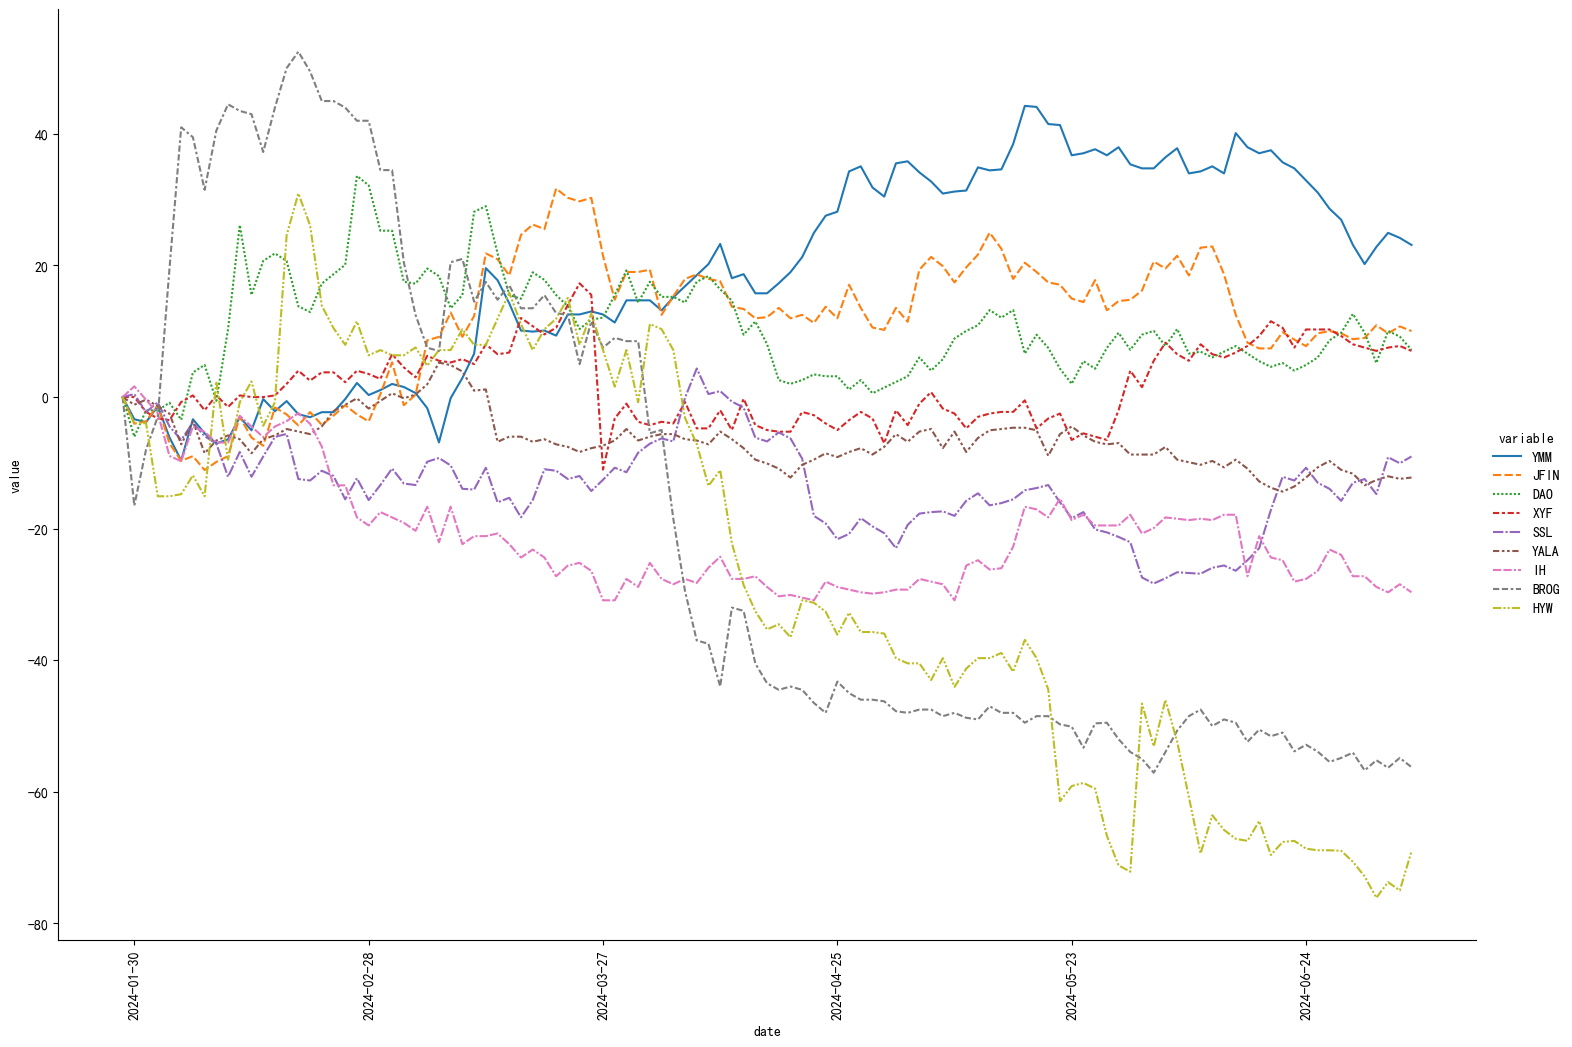

In [7]:
from utils.us_equity_utils import *

# symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = filtered_df.index.get_level_values(1).values
# symbols = us_equity_symbol_load().head(2000)
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')

start_date = '2024-01-29'
end_date = '2024-07-08'

data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, trade_option = 'close')
data = pd.DataFrame(data)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]
# data = data.loc[:, data.iloc[-1] > 30]

file = sector_name + start_date + "_" + end_date + ".csv"
folder = us_equity_research_folder(sub_folder = "price", file_name = file, data = data)

print(data.tail(1).transpose())

# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='date', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='date', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:20]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)